#Data Preparation

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2

In [ ]:
dict = {'pixels':[],'labels':[],'type':[]}
folder= r'drive/MyDrive/project/data'

In [ ]:
for dtype in os.listdir(folder):
  path1 = os.path.join(folder,dtype)
  for expression in os.listdir(path1):
    path2 = os.path.join(path1,expression)
    for x in os.listdir(path2):
      imagepath = os.path.join(path2,x)
      image = cv2.imread(imagepath,0)
      image = image.reshape(48,48,1)

      dict['pixels'].append(image)
      dict['labels'].append(expression)
      dict['type'].append(dtype)
  
df = pd.DataFrame(dict)
df.head()

,pixels,labels,type
0,"[[[64], [62], [64], [65], [62], [63], [65], [6...",angry,test
1,"[[[121], [139], [145], [130], [129], [132], [1...",angry,test
2,"[[[67], [65], [59], [60], [42], [16], [4], [6]...",angry,test
3,"[[[92], [93], [90], [85], [207], [237], [226],...",angry,test
4,"[[[173], [170], [160], [142], [118], [86], [25...",angry,test


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pixels  35887 non-null  object
 1   labels  35887 non-null  object
 2   type    35887 non-null  object
dtypes: object(3)
memory usage: 841.2+ KB


In [ ]:
df.shape

(35887, 3)

In [ ]:
df.type.value_counts()

train    28709
test      7178
Name: type, dtype: int64

In [ ]:
train_data = df[df['type']=='train']
test_data = df[df['type']=='test']

In [ ]:
print(train_data.shape)
print(test_data.shape)

(28709, 3)
(7178, 3)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

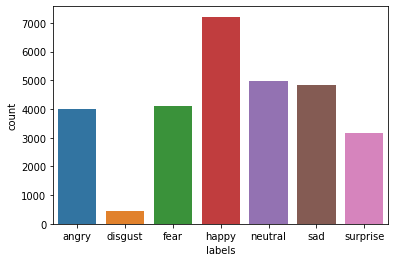

In [ ]:
sns.countplot(train_data['labels'])

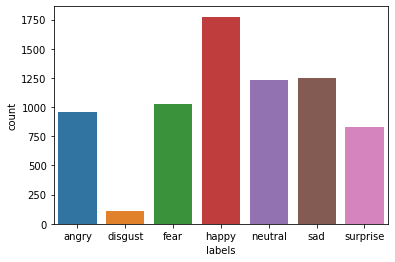

In [ ]:
sns.countplot(test_data['labels'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

train_data['labels'] = le.fit_transform(train_data['labels'])
test_data['labels'] = le.transform(test_data['labels'])

In [ ]:
le.classes_

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [ ]:
train_data.head()


,pixels,labels,type
7178,"[[[251], [235], [216], [198], [207], [218], [2...",0,train
7179,"[[[4], [5], [2], [2], [31], [62], [77], [86], ...",0,train
7180,"[[[113], [68], [64], [65], [79], [19], [37], [...",0,train
7181,"[[[163], [112], [100], [83], [95], [109], [136...",0,train
7182,"[[[202], [204], [198], [197], [188], [170], [9...",0,train


In [ ]:
test_data.head()

,pixels,labels,type
0,"[[[64], [62], [64], [65], [62], [63], [65], [6...",0,test
1,"[[[121], [139], [145], [130], [129], [132], [1...",0,test
2,"[[[67], [65], [59], [60], [42], [16], [4], [6]...",0,test
3,"[[[92], [93], [90], [85], [207], [237], [226],...",0,test
4,"[[[173], [170], [160], [142], [118], [86], [25...",0,test


In [ ]:
train_data.labels.value_counts()

3    7215
4    4965
5    4830
2    4097
0    3995
6    3171
1     436
Name: labels, dtype: int64

In [ ]:
x_train = train_data['pixels']
y_train = train_data['labels']
x_test = test_data['pixels']
y_test = test_data['labels']

In [ ]:
x = np.array(list(x_train))
y = np.array(list(y_train))

In [ ]:
xte = np.array(list(x_test))
yte = np.array(list(y_test))

In [ ]:
x = x/255.0
xte = xte/255.0

#model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization

In [ ]:
model = Sequential()

model.add(Conv2D(16,(3,3),activation='relu', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(1024,activation = 'relu'))

model.add(Dense(7, activation='softmax'))


NameError: ignored

In [ ]:
import tensorflow as tf

In [ ]:
#from tensorflow.keras.optimizers import Adam
model.compile(optimizer = tf.keras.optimizers.Adam(lr=0.0001, decay=1e-6), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        160       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 21, 21, 32)       1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=8, min_delta=0.001, mode='max')

In [ ]:
history = model.fit(x,y, epochs=1000, callbacks=[early_stopping], validation_data=(xte,yte))

Epoch 1/100
898/898 [==============================] - 18s 6ms/step - loss: 1.8006 - accuracy: 0.2536 - val_loss: 1.7674 - val_accuracy: 0.2682
Epoch 2/100
898/898 [==============================] - 5s 6ms/step - loss: 1.7451 - accuracy: 0.2924 - val_loss: 1.7263 - val_accuracy: 0.3002
Epoch 3/100
898/898 [==============================] - 5s 6ms/step - loss: 1.6988 - accuracy: 0.3204 - val_loss: 1.6249 - val_accuracy: 0.3639
Epoch 4/100
898/898 [==============================] - 5s 6ms/step - loss: 1.6527 - accuracy: 0.3480 - val_loss: 1.5632 - val_accuracy: 0.3902
Epoch 5/100
898/898 [==============================] - 5s 6ms/step - loss: 1.6149 - accuracy: 0.3658 - val_loss: 1.5213 - val_accuracy: 0.4115
Epoch 6/100
898/898 [==============================] - 5s 6ms/step - loss: 1.5936 - accuracy: 0.3752 - val_loss: 1.4969 - val_accuracy: 0.4182
Epoch 7/100
898/898 [==============================] - 5s 6ms/step - loss: 1.5655 - accuracy: 0.3867 - val_loss: 1.4763 - val_accuracy: 0.423

In [ ]:
#model.save('model.h5')

In [ ]:
#model.save('drive/MyDrive/project/model.h5')

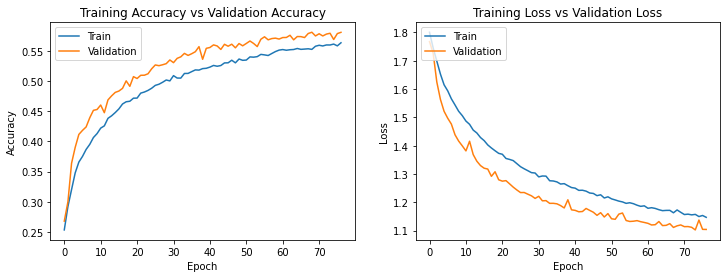

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
train_loss, train_acc = model.evaluate(x,y)
test_loss, test_acc   = model.evaluate(xte,yte)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

225/225 [==============================] - 1s 3ms/step - loss: 1.1041 - accuracy: 0.5804
final train accuracy = 65.81 , validation accuracy = 58.04


#Model1

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import matplotlib.pyplot as plt

In [ ]:
def create_model(input_size, classes = 7):
    
    model = tf.keras.models.Sequential()   

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_size))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    #model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.3))
    
    model.add(Dense(classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(lr=0.0001, decay=1e-6), loss='sparse_categorical_crossentropy',  metrics=['accuracy'])
    
    
    return model

In [ ]:
model1 = create_model((48,48,1), 7)
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 256)       295168    
                                                      

In [ ]:
chk_path = 'my_model.h5'
log_dir = "checkpoint/logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

checkpoint = ModelCheckpoint(filepath=chk_path, save_best_only=True, verbose=1, mode='min', moniter='val_loss')

earlystop = EarlyStopping(monitor='val_loss',  min_delta=0,  patience=3,  verbose=1,  restore_best_weights=True)
                        
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=6, verbose=1, min_delta=0.0001)


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
csv_logger = CSVLogger('training.log')

callbacks = [checkpoint, reduce_lr, csv_logger , earlystop]

In [ ]:
history1 = model1.fit(x,y, epochs=100, callbacks=callbacks, validation_data=(xte,yte))


Epoch 1/100
898/898 [==============================] - ETA: 0s - loss: 2.3104 - accuracy: 0.3201
Epoch 1: val_loss improved from inf to 1.70734, saving model to my_model.h5
898/898 [==============================] - 23s 25ms/step - loss: 2.3104 - accuracy: 0.3201 - val_loss: 1.7073 - val_accuracy: 0.3771 - lr: 1.0000e-04
Epoch 2/100
898/898 [==============================] - ETA: 0s - loss: 1.5954 - accuracy: 0.4144
Epoch 2: val_loss improved from 1.70734 to 1.52075, saving model to my_model.h5
898/898 [==============================] - 22s 24ms/step - loss: 1.5954 - accuracy: 0.4144 - val_loss: 1.5207 - val_accuracy: 0.4330 - lr: 1.0000e-04
Epoch 3/100
897/898 [============================>.] - ETA: 0s - loss: 1.4898 - accuracy: 0.4512
Epoch 3: val_loss improved from 1.52075 to 1.45793, saving model to my_model.h5
898/898 [==============================] - 22s 25ms/step - loss: 1.4897 - accuracy: 0.4513 - val_loss: 1.4579 - val_accuracy: 0.4575 - lr: 1.0000e-04
Epoch 4/100
896/898 [==

In [ ]:
train_loss, train_acc = model1.evaluate(x,y)
test_loss, test_acc   = model1.evaluate(xte,yte)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

225/225 [==============================] - 2s 8ms/step - loss: 1.2884 - accuracy: 0.5627
final train accuracy = 76.22 , validation accuracy = 56.27


#Model2

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping


In [ ]:
import keras

In [ ]:
EPOCHS = 150
BS = 128
DROPOUT_RATE = 0.3
SGD_LEARNING_RATE = 0.01
SGD_DECAY = 0.0001

In [ ]:
model2 = Sequential()
model2.add(BatchNormalization(input_shape=(48,48,1)))
model2.add(Conv2D(32, (5,5), activation='relu',padding='same', input_shape=(48,48,1),name="conv1"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(3,3),strides =2,name="maxpool1"))
model2.add(Dropout(0.2))
model2.add(Conv2D(32, (4,4), activation='relu',padding='same',name="conv2"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(3,3),strides =2,name="maxpool2"))         
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (6,6), activation='relu',padding='same',name="conv3"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(3,3),strides =2,name="maxpool3"))
model2.add(Dropout(0.2))
model2.add(Conv2D(128, (5,5), activation='relu',padding='same',name="conv4"))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(3,3),strides =2,name="maxpool4"))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(1024, activation='relu',name='fc1'))
model2.add(Dropout(DROPOUT_RATE))
model2.add(BatchNormalization())
model2.add(Dense(7, activation='softmax',name='fcsoftmax'))

#TODO: weight decay of 0.0001...initial learning rate is set to 0.01 and reduced by a factor of 2 at every 25 epoch
sgd = SGD(lr=SGD_LEARNING_RATE,momentum=0.9, decay=SGD_DECAY, nesterov=True)
model2.compile(loss='sparse_categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

# checkpoint
cp_filepath='Baseline-weights-best.hdf5'
rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',mode='max',factor=0.5, patience=10, min_lr=0.00001, verbose=1)
checkpoint = ModelCheckpoint(cp_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=8, min_delta=0.001, mode='max')
callbacks_list = [rlrop,checkpoint,early_stopping]

In [ ]:
history2 = model2.fit(x,y, shuffle=True,epochs=100,callbacks=callbacks_list,validation_data=(xte,yte))

Epoch 1/100
898/898 [==============================] - ETA: 0s - loss: 2.1958 - accuracy: 0.2723
Epoch 1: val_accuracy improved from -inf to 0.34425, saving model to Baseline-weights-best.hdf5
898/898 [==============================] - 9s 8ms/step - loss: 2.1958 - accuracy: 0.2723 - val_loss: 1.9097 - val_accuracy: 0.3442 - lr: 0.0100
Epoch 2/100
896/898 [============================>.] - ETA: 0s - loss: 1.9240 - accuracy: 0.3533
Epoch 2: val_accuracy did not improve from 0.34425
898/898 [==============================] - 7s 7ms/step - loss: 1.9239 - accuracy: 0.3533 - val_loss: 11.0012 - val_accuracy: 0.2629 - lr: 0.0100
Epoch 3/100
897/898 [============================>.] - ETA: 0s - loss: 1.7452 - accuracy: 0.3907
Epoch 3: val_accuracy improved from 0.34425 to 0.45514, saving model to Baseline-weights-best.hdf5
898/898 [==============================] - 9s 10ms/step - loss: 1.7452 - accuracy: 0.3907 - val_loss: 1.6363 - val_accuracy: 0.4551 - lr: 0.0100
Epoch 4/100
891/898 [========

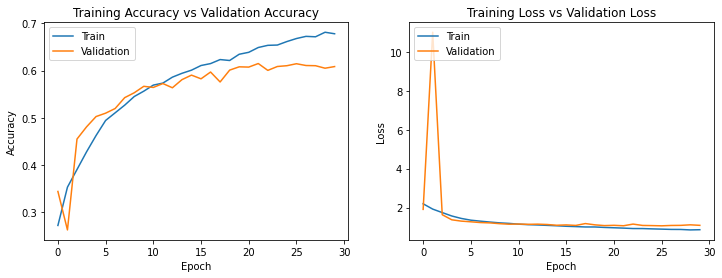

In [ ]:
fig , ax = plt.subplots(1,2)
train_acc = history2.history['accuracy']
train_loss = history2.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history2.history['accuracy'])
ax[0].plot(history2.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history2.history['loss'])
ax[1].plot(history2.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')


In [ ]:
train_loss, train_acc = model2.evaluate(x,y)
test_loss, test_acc   = model2.evaluate(xte,yte)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

225/225 [==============================] - 1s 4ms/step - loss: 1.0902 - accuracy: 0.6085
final train accuracy = 77.70 , validation accuracy = 60.85


#Model3

In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Input,BatchNormalization,Dropout,Dense
from tensorflow.keras.models import Model

def create_modell(input_shape = (48,48,1),num_classes=7):

    input = Input(shape=input_shape)
    x = Conv2D(filters=256,kernel_size=3,activation='relu',padding='same')(input)

    x = Conv2D(filters=512,kernel_size=3,activation='relu',padding='same')(x)
    x = BatchNormalization()(x)

    #
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.4)(x)

    x = Conv2D(filters=384,kernel_size=3,activation='relu',padding='same')(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.4)(x)

    x = Conv2D(filters=192,kernel_size=3,activation='relu',padding='same')(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.4)(x)


    x = Conv2D(filters=384,kernel_size=3,activation='relu',padding='same')(x)
    x = BatchNormalization()(x)

    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.4)(x)

    x = Flatten()(x)

    x = Dense(256,activation='relu')(x)
    x = BatchNormalization()(x)

    x = Dropout(0.3)(x)
    x = Dense(num_classes,activation='softmax')(x)

    return Model(input,x,name='fer_model')

In [ ]:
model3 = create_modell()
model3.summary()

Model: "fer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 48, 48, 256)       2560      
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 512)       1180160   
                                                                 
 batch_normalization_10 (Bat  (None, 48, 48, 512)      2048      
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 512)      0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 512)       0 

In [ ]:
import tensorflow as tf


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
model3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'],optimizer=optimizer)
history3 = model3.fit(x,y,epochs=800,callbacks=[early_stopping],validation_data=(xte,yte))

Epoch 1/800
898/898 [==============================] - 95s 103ms/step - loss: 1.9236 - accuracy: 0.2717 - val_loss: 1.9073 - val_accuracy: 0.2654
Epoch 2/800
898/898 [==============================] - 85s 95ms/step - loss: 1.5075 - accuracy: 0.4136 - val_loss: 1.5417 - val_accuracy: 0.3966
Epoch 3/800
898/898 [==============================] - 85s 95ms/step - loss: 1.3213 - accuracy: 0.4958 - val_loss: 1.2463 - val_accuracy: 0.5293
Epoch 4/800
898/898 [==============================] - 85s 94ms/step - loss: 1.2336 - accuracy: 0.5307 - val_loss: 1.2127 - val_accuracy: 0.5403
Epoch 5/800
898/898 [==============================] - 85s 94ms/step - loss: 1.1859 - accuracy: 0.5531 - val_loss: 1.1883 - val_accuracy: 0.5497
Epoch 6/800
898/898 [==============================] - 86s 96ms/step - loss: 1.1371 - accuracy: 0.5701 - val_loss: 1.1128 - val_accuracy: 0.5726
Epoch 7/800
898/898 [==============================] - 85s 95ms/step - loss: 1.1048 - accuracy: 0.5843 - val_loss: 1.0762 - val_a

In [ ]:
train_loss, train_acc = model3.evaluate(x,y)
test_loss, test_acc   = model3.evaluate(xte,yte)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

225/225 [==============================] - 6s 27ms/step - loss: 1.0342 - accuracy: 0.6553
final train accuracy = 90.73 , validation accuracy = 65.53


#model4

In [ ]:
model4 = Sequential()

# Conv Block 1
model4.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

# Conv Block 2
model4.add(Conv2D(128,(5,5), padding='same'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

# Conv Block 3
model4.add(Conv2D(512,(3,3), padding='same'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

# Conv Block 3
model4.add(Conv2D(512,(3,3), padding='same'))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

model4.add(Flatten())

# Fully connected Block 1
model4.add(Dense(256))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.25))

# Fully connected Block 2
model4.add(Dense(512))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.25))

model4.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model4.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_15 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 24, 24, 128)      

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss' , factor=0.1, patience=2, min_lr=0.00001,model='auto')

history4 = model4.fit(x,y,epochs=100,callbacks= [reduce_lr],validation_data=(xte,yte))

Epoch 1/100
898/898 [==============================] - 19s 18ms/step - loss: 1.7678 - accuracy: 0.3210 - val_loss: 1.4983 - val_accuracy: 0.4320 - lr: 5.0000e-04
Epoch 2/100
898/898 [==============================] - 16s 18ms/step - loss: 1.4328 - accuracy: 0.4484 - val_loss: 1.3664 - val_accuracy: 0.4724 - lr: 5.0000e-04
Epoch 3/100
898/898 [==============================] - 16s 18ms/step - loss: 1.2753 - accuracy: 0.5145 - val_loss: 1.2653 - val_accuracy: 0.5103 - lr: 5.0000e-04
Epoch 4/100
898/898 [==============================] - 17s 19ms/step - loss: 1.1987 - accuracy: 0.5429 - val_loss: 1.1400 - val_accuracy: 0.5655 - lr: 5.0000e-04
Epoch 5/100
898/898 [==============================] - 16s 18ms/step - loss: 1.1418 - accuracy: 0.5704 - val_loss: 1.1759 - val_accuracy: 0.5521 - lr: 5.0000e-04
Epoch 6/100
898/898 [==============================] - 16s 18ms/step - loss: 1.0980 - accuracy: 0.5833 - val_loss: 1.3518 - val_accuracy: 0.5015 - lr: 5.0000e-04
Epoch 7/100
898/898 [=======

In [ ]:
train_loss, train_acc = model4.evaluate(x,y)
test_loss, test_acc   = model4.evaluate(xte,yte)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

225/225 [==============================] - 1s 6ms/step - loss: 1.0372 - accuracy: 0.6560
final train accuracy = 91.47 , validation accuracy = 65.60


#Model5

In [ ]:
model5 = Sequential()

# 1. Conv
model5.add(Conv2D(64, (3, 3), padding='same', input_shape=(48,48,1)))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))


# 2. Conv Layer
model5.add(Conv2D(128, (5, 5), padding='same'))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))

# 3. Conv Layer
model5.add(Conv2D(512, (3,3), padding='same'))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))

#4. Conv Layer
model5.add(Conv2D(512, (3,3), padding='same'))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.25))

model5.add(Flatten())
model5.add(Dense(256))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.25))

model5.add(Dense(512))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.25))

model5.add(Dense(7, activation='softmax'))
model5.compile(optimizer=Adam(lr=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_21 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 128)      

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

history5 = model5.fit(x,y,epochs=100,callbacks=[early_stopping],validation_data=(xte,yte))

Epoch 1/100
898/898 [==============================] - 17s 18ms/step - loss: 1.8076 - accuracy: 0.3038 - val_loss: 1.5990 - val_accuracy: 0.3752
Epoch 2/100
898/898 [==============================] - 16s 18ms/step - loss: 1.4598 - accuracy: 0.4385 - val_loss: 1.3081 - val_accuracy: 0.4989
Epoch 3/100
898/898 [==============================] - 16s 18ms/step - loss: 1.2979 - accuracy: 0.5031 - val_loss: 1.2654 - val_accuracy: 0.5082
Epoch 4/100
898/898 [==============================] - 16s 18ms/step - loss: 1.2114 - accuracy: 0.5400 - val_loss: 1.1748 - val_accuracy: 0.5557
Epoch 5/100
898/898 [==============================] - 16s 18ms/step - loss: 1.1462 - accuracy: 0.5652 - val_loss: 1.1941 - val_accuracy: 0.5488
Epoch 6/100
898/898 [==============================] - 16s 18ms/step - loss: 1.1041 - accuracy: 0.5784 - val_loss: 1.1267 - val_accuracy: 0.5766
Epoch 7/100
898/898 [==============================] - 16s 18ms/step - loss: 1.0587 - accuracy: 0.5970 - val_loss: 1.2200 - val_ac

In [ ]:
train_loss, train_acc = model5.evaluate(x,y)
test_loss, test_acc   = model5.evaluate(xte,yte)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

225/225 [==============================] - 1s 6ms/step - loss: 1.2402 - accuracy: 0.6383
final train accuracy = 94.89 , validation accuracy = 63.83


#Model6

In [ ]:
model6: keras.Model = keras.models.Sequential(
    [
     # Block 1
     keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                         padding='same', input_shape=(48,48, 1)),
     keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                         padding='same'),
     keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
     keras.layers.BatchNormalization(),

     # Block 2
     keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',
                         padding='same'),
     keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',
                         padding='same'),
     keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
     keras.layers.BatchNormalization(),

     # Block 3
     keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu',
                         padding='same'),
     keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu',
                         padding='same'),
     keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
     keras.layers.BatchNormalization(),

     # Flattens the input for FC
     keras.layers.Flatten(),

     # fully connected layers
     keras.layers.Dense(750, activation='relu'),
     keras.layers.Dropout(0.5),
     keras.layers.Dense(850, activation='relu'),
     keras.layers.Dropout(0.5),
     keras.layers.Dense(850, activation='relu'),
     keras.layers.Dropout(0.5),
     keras.layers.Dense(750, activation='relu'),
     keras.layers.Dropout(0.5),

     # classification layer
     keras.layers.Dense(7, activation='softmax')
    ]
)
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_28 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_30 (Bat  (None, 24, 24, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 conv2d_30 (Conv2D)          (None, 24, 24, 64)       

In [ ]:
model6.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

history6 = model6.fit(x,y,epochs=100,callbacks=[early_stopping],validation_data=(xte,yte))

Epoch 1/100
898/898 [==============================] - 10s 10ms/step - loss: 1.8406 - accuracy: 0.2558 - val_loss: 1.6787 - val_accuracy: 0.3239
Epoch 2/100
898/898 [==============================] - 9s 10ms/step - loss: 1.5843 - accuracy: 0.3707 - val_loss: 1.6876 - val_accuracy: 0.3155
Epoch 3/100
898/898 [==============================] - 9s 10ms/step - loss: 1.4734 - accuracy: 0.4243 - val_loss: 1.4971 - val_accuracy: 0.4490
Epoch 4/100
898/898 [==============================] - 10s 11ms/step - loss: 1.3940 - accuracy: 0.4669 - val_loss: 1.4419 - val_accuracy: 0.4505
Epoch 5/100
898/898 [==============================] - 10s 11ms/step - loss: 1.3411 - accuracy: 0.4890 - val_loss: 1.2887 - val_accuracy: 0.4980
Epoch 6/100
898/898 [==============================] - 9s 10ms/step - loss: 1.3036 - accuracy: 0.5081 - val_loss: 1.4166 - val_accuracy: 0.4918
Epoch 7/100
898/898 [==============================] - 9s 10ms/step - loss: 1.2561 - accuracy: 0.5287 - val_loss: 1.3035 - val_accura

In [ ]:
train_loss, train_acc = model6.evaluate(x,y)
test_loss, test_acc   = model6.evaluate(xte,yte)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

225/225 [==============================] - 1s 4ms/step - loss: 1.2647 - accuracy: 0.5841
final train accuracy = 91.03 , validation accuracy = 58.41


#Model7

In [ ]:
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten
from keras.models import Sequential

In [ ]:
def get_model1():
  model = Sequential()

  model.add(Convolution2D(64, (3, 3), padding='same', input_shape=(48,48,1)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
  model.add(Dropout(0.25))

  model.add(Convolution2D(128, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
  model.add(Dropout(0.25))

  model.add(Convolution2D(256, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
  model.add(Dropout(0.25))

  model.add(Convolution2D(512, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(512))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

  model.add(Dense(7))
  model.add(Activation('softmax'))

  return model


In [ ]:
model7 = get_model1()

In [ ]:
model7.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

history7 = model7.fit(x,y,epochs=100,callbacks=[early_stopping],validation_data=(xte,yte))

Epoch 1/100
898/898 [==============================] - 14s 14ms/step - loss: 1.6755 - accuracy: 0.3523 - val_loss: 1.3994 - val_accuracy: 0.4606
Epoch 2/100
898/898 [==============================] - 13s 14ms/step - loss: 1.3406 - accuracy: 0.4859 - val_loss: 1.2346 - val_accuracy: 0.5254
Epoch 3/100
898/898 [==============================] - 14s 16ms/step - loss: 1.2424 - accuracy: 0.5281 - val_loss: 1.1980 - val_accuracy: 0.5401
Epoch 4/100
898/898 [==============================] - 13s 15ms/step - loss: 1.1749 - accuracy: 0.5533 - val_loss: 1.4018 - val_accuracy: 0.4759
Epoch 5/100
898/898 [==============================] - 12s 14ms/step - loss: 1.1274 - accuracy: 0.5754 - val_loss: 1.1754 - val_accuracy: 0.5536
Epoch 6/100
898/898 [==============================] - 12s 13ms/step - loss: 1.0775 - accuracy: 0.5923 - val_loss: 1.4036 - val_accuracy: 0.4544
Epoch 7/100
898/898 [==============================] - 13s 14ms/step - loss: 1.0290 - accuracy: 0.6134 - val_loss: 1.1219 - val_ac

In [ ]:
train_loss, train_acc = model7.evaluate(x,y)
test_loss, test_acc   = model7.evaluate(xte,yte)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

225/225 [==============================] - 1s 5ms/step - loss: 1.2492 - accuracy: 0.6335
final train accuracy = 94.42 , validation accuracy = 63.35


#Model8

In [ ]:
def get_model2():
  model = Sequential()

  model.add(Convolution2D(64, (3, 3), padding='same', input_shape=(48,48,1)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
  model.add(Dropout(0.25))

  model.add(Convolution2D(128, (5, 5), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
  model.add(Dropout(0.25))

  model.add(Convolution2D(512, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
  model.add(Dropout(0.25))

  model.add(Convolution2D(512, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

  model.add(Dense(512))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

  model.add(Dense(7))
  model.add(Activation('softmax'))

  return model

In [ ]:
model8 = get_model2()

In [ ]:
model8.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

history8 = model8.fit(x,y,epochs=100,callbacks=[early_stopping],validation_data=(xte,yte))

Epoch 1/100
898/898 [==============================] - 17s 18ms/step - loss: 1.7138 - accuracy: 0.3418 - val_loss: 1.4421 - val_accuracy: 0.4469
Epoch 2/100
898/898 [==============================] - 16s 18ms/step - loss: 1.3679 - accuracy: 0.4781 - val_loss: 1.4386 - val_accuracy: 0.4490
Epoch 3/100
898/898 [==============================] - 16s 18ms/step - loss: 1.2460 - accuracy: 0.5268 - val_loss: 1.2996 - val_accuracy: 0.5038
Epoch 4/100
898/898 [==============================] - 16s 17ms/step - loss: 1.1662 - accuracy: 0.5582 - val_loss: 1.1646 - val_accuracy: 0.5531
Epoch 5/100
898/898 [==============================] - 16s 18ms/step - loss: 1.1154 - accuracy: 0.5779 - val_loss: 1.1481 - val_accuracy: 0.5588
Epoch 6/100
898/898 [==============================] - 16s 18ms/step - loss: 1.0725 - accuracy: 0.5954 - val_loss: 1.3089 - val_accuracy: 0.5099
Epoch 7/100
898/898 [==============================] - 17s 19ms/step - loss: 1.0162 - accuracy: 0.6183 - val_loss: 1.1310 - val_ac

In [ ]:
train_loss, train_acc = model8.evaluate(x,y)
test_loss, test_acc   = model8.evaluate(xte,yte)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

225/225 [==============================] - 1s 6ms/step - loss: 1.2300 - accuracy: 0.6204
final train accuracy = 92.97 , validation accuracy = 62.04


#Model9

In [ ]:
def get_model3():
  model = Sequential()

  model.add(Convolution2D(64, (3, 3), padding='same', input_shape=(48,48,1)))
  model.add(Convolution2D(64, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
  model.add(Dropout(0.4))

  model.add(Convolution2D(128, (3, 3), padding='same'))
  model.add(Convolution2D(128, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
  model.add(Dropout(0.4))

  model.add(Convolution2D(256, (3, 3), padding='same'))
  model.add(Convolution2D(265, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
  model.add(Dropout(0.4))

  model.add(Convolution2D(512, (3, 3), padding='same'))
  model.add(Convolution2D(512, (3, 3), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
  model.add(Dropout(0.4))

  model.add(Flatten())

  model.add(Dense(2048))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.4))

  model.add(Dense(512))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.4))

  model.add(Dense(7))
  model.add(Activation('softmax'))

  return model

In [ ]:
model9 = get_model3()

In [ ]:
model9.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

history9 = model9.fit(x,y,epochs=100,callbacks=[early_stopping],validation_data=(xte,yte))

Epoch 1/100
898/898 [==============================] - 29s 30ms/step - loss: 1.9109 - accuracy: 0.2518 - val_loss: 1.9052 - val_accuracy: 0.2594
Epoch 2/100
898/898 [==============================] - 27s 30ms/step - loss: 1.5138 - accuracy: 0.4171 - val_loss: 1.4127 - val_accuracy: 0.4533
Epoch 3/100
898/898 [==============================] - 27s 30ms/step - loss: 1.3481 - accuracy: 0.4843 - val_loss: 1.2693 - val_accuracy: 0.5143
Epoch 4/100
898/898 [==============================] - 27s 30ms/step - loss: 1.2774 - accuracy: 0.5115 - val_loss: 1.3101 - val_accuracy: 0.4943
Epoch 5/100
898/898 [==============================] - 27s 30ms/step - loss: 1.2366 - accuracy: 0.5285 - val_loss: 1.3311 - val_accuracy: 0.4911
Epoch 6/100
898/898 [==============================] - 27s 31ms/step - loss: 1.2013 - accuracy: 0.5402 - val_loss: 1.1483 - val_accuracy: 0.5644
Epoch 7/100
898/898 [==============================] - 27s 30ms/step - loss: 1.1648 - accuracy: 0.5573 - val_loss: 1.1184 - val_ac

In [ ]:
train_loss, train_acc = model9.evaluate(x,y)
test_loss, test_acc   = model9.evaluate(xte,yte)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

225/225 [==============================] - 2s 11ms/step - loss: 1.0326 - accuracy: 0.6454
final train accuracy = 83.33 , validation accuracy = 64.54


#Model10

In [ ]:
def get_model4():
  model = Sequential()

  model.add(Convolution2D(64, (3, 3), padding='same', input_shape=(48,48,1)))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
  model.add(Dropout(0.25))

  model.add(Convolution2D(128, (5, 5), padding='same'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(256))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.25))

  model.add(Dense(7))
  model.add(Activation('softmax'))

  return model

In [ ]:
model10 = get_model4()

In [ ]:
model10.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

history10 = model10.fit(x,y,epochs=100,callbacks=[early_stopping],validation_data=(xte,yte))

Epoch 1/100
898/898 [==============================] - 12s 12ms/step - loss: 1.5988 - accuracy: 0.3938 - val_loss: 1.4870 - val_accuracy: 0.4191
Epoch 2/100
898/898 [==============================] - 10s 11ms/step - loss: 1.3094 - accuracy: 0.5014 - val_loss: 1.4553 - val_accuracy: 0.4014
Epoch 3/100
898/898 [==============================] - 11s 12ms/step - loss: 1.1907 - accuracy: 0.5520 - val_loss: 1.2240 - val_accuracy: 0.5280
Epoch 4/100
898/898 [==============================] - 10s 11ms/step - loss: 1.0826 - accuracy: 0.5946 - val_loss: 1.4356 - val_accuracy: 0.4809
Epoch 5/100
898/898 [==============================] - 11s 12ms/step - loss: 0.9908 - accuracy: 0.6312 - val_loss: 1.4079 - val_accuracy: 0.4726
Epoch 6/100
898/898 [==============================] - 10s 11ms/step - loss: 0.8798 - accuracy: 0.6760 - val_loss: 1.2292 - val_accuracy: 0.5532
Epoch 7/100
898/898 [==============================] - 11s 12ms/step - loss: 0.7726 - accuracy: 0.7197 - val_loss: 1.2139 - val_ac

In [ ]:
train_loss, train_acc = model10.evaluate(x,y)
test_loss, test_acc   = model10.evaluate(xte,yte)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

225/225 [==============================] - 1s 4ms/step - loss: 1.4801 - accuracy: 0.5808
final train accuracy = 98.64 , validation accuracy = 58.08


#Visualization

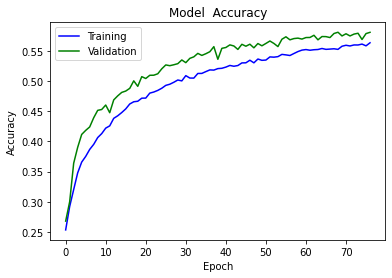

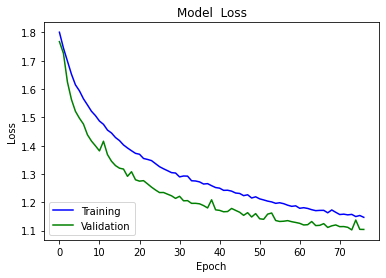

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], color='b', label='Training')
plt.plot(history.history['val_accuracy'], color='g', label='Validation')
plt.title('Model  Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.figure()
plt.plot(history.history['loss'], color='b', label='Training')
plt.plot(history.history['val_loss'], color='g', label='Validation')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower left')
plt.show()


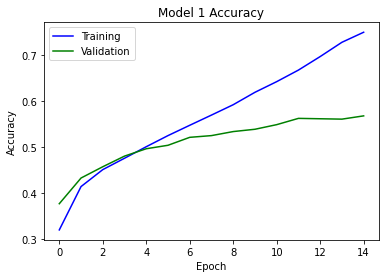

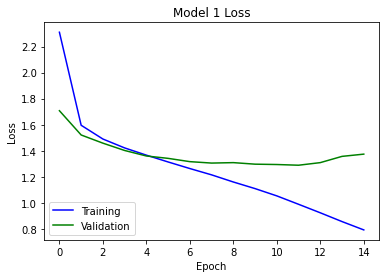

In [ ]:
plt.figure()
plt.plot(history1.history['accuracy'], color='b', label='Training')
plt.plot(history1.history['val_accuracy'], color='g', label='Validation')
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.figure()
plt.plot(history1.history['loss'], color='b', label='Training')
plt.plot(history1.history['val_loss'], color='g', label='Validation')
plt.title('Model 1 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower left')
plt.show()


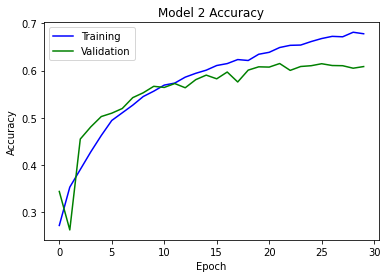

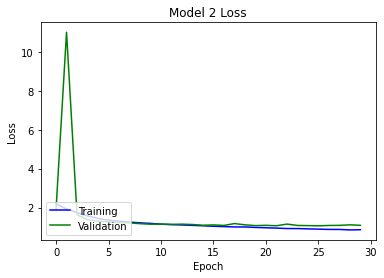

In [ ]:
plt.figure()
plt.plot(history2.history['accuracy'], color='b', label='Training')
plt.plot(history2.history['val_accuracy'], color='g', label='Validation')
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.figure()
plt.plot(history2.history['loss'], color='b', label='Training')
plt.plot(history2.history['val_loss'], color='g', label='Validation')
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower left')
plt.show()


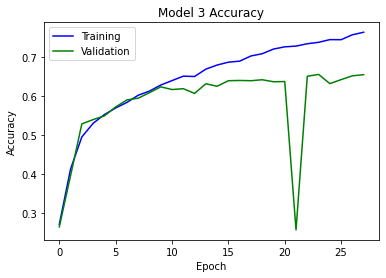

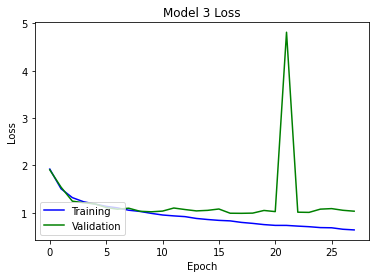

In [ ]:
plt.figure()
plt.plot(history3.history['accuracy'], color='b', label='Training')
plt.plot(history3.history['val_accuracy'], color='g', label='Validation')
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.figure()
plt.plot(history3.history['loss'], color='b', label='Training')
plt.plot(history3.history['val_loss'], color='g', label='Validation')
plt.title('Model 3 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower left')
plt.show()


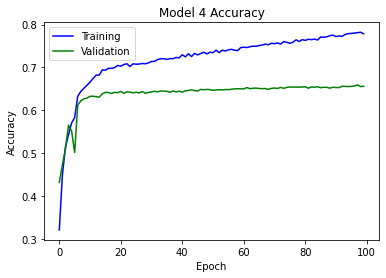

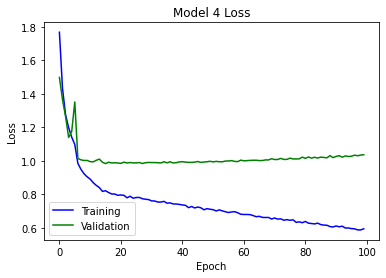

In [ ]:
plt.figure()
plt.plot(history4.history['accuracy'], color='b', label='Training')
plt.plot(history4.history['val_accuracy'], color='g', label='Validation')
plt.title('Model 4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.figure()
plt.plot(history4.history['loss'], color='b', label='Training')
plt.plot(history4.history['val_loss'], color='g', label='Validation')
plt.title('Model 4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower left')
plt.show()


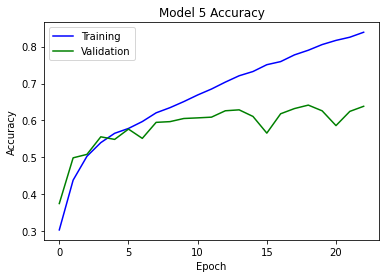

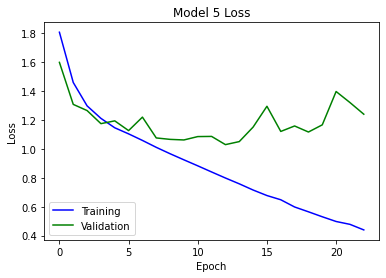

In [ ]:
plt.figure()
plt.plot(history5.history['accuracy'], color='b', label='Training')
plt.plot(history5.history['val_accuracy'], color='g', label='Validation')
plt.title('Model 5 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.figure()
plt.plot(history5.history['loss'], color='b', label='Training')
plt.plot(history5.history['val_loss'], color='g', label='Validation')
plt.title('Model 5 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower left')
plt.show()


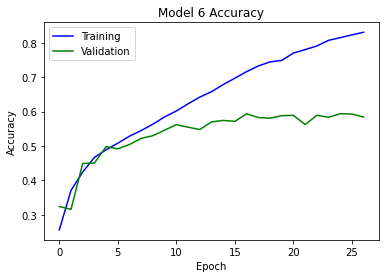

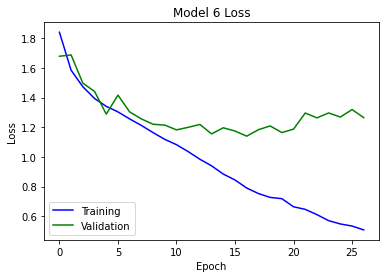

In [ ]:
plt.figure()
plt.plot(history6.history['accuracy'], color='b', label='Training')
plt.plot(history6.history['val_accuracy'], color='g', label='Validation')
plt.title('Model 6 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.figure()
plt.plot(history6.history['loss'], color='b', label='Training')
plt.plot(history6.history['val_loss'], color='g', label='Validation')
plt.title('Model 6 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower left')
plt.show()


In [ ]:
plt.figure()
plt.plot(history7.history['acc'], color='b', label='Training')
plt.plot(history7.history['val_acc'], color='g', label='Validation')
plt.title('Model 7 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.figure()
plt.plot(history7.history['loss'], color='b', label='Training')
plt.plot(history7.history['val_loss'], color='g', label='Validation')
plt.title('Model 7 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower left')
plt.show()


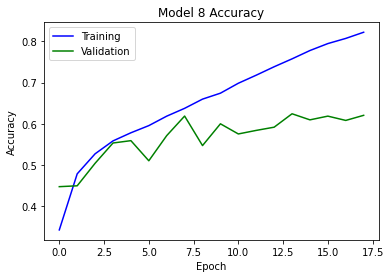

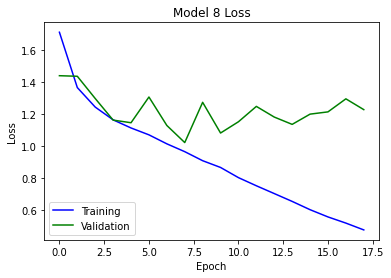

In [ ]:
plt.figure()
plt.plot(history8.history['accuracy'], color='b', label='Training')
plt.plot(history8.history['val_accuracy'], color='g', label='Validation')
plt.title('Model 8 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.figure()
plt.plot(history8.history['loss'], color='b', label='Training')
plt.plot(history8.history['val_loss'], color='g', label='Validation')
plt.title('Model 8 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower left')
plt.show()


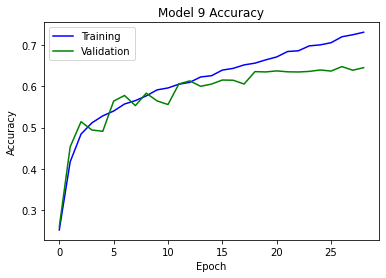

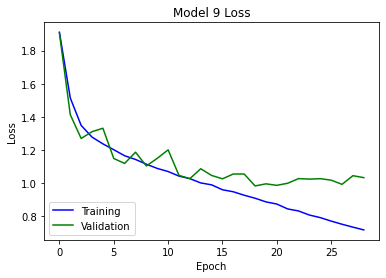

In [ ]:
plt.figure()
plt.plot(history9.history['accuracy'], color='b', label='Training')
plt.plot(history9.history['val_accuracy'], color='g', label='Validation')
plt.title('Model 9 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.figure()
plt.plot(history9.history['loss'], color='b', label='Training')
plt.plot(history9.history['val_loss'], color='g', label='Validation')
plt.title('Model 9 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower left')
plt.show()


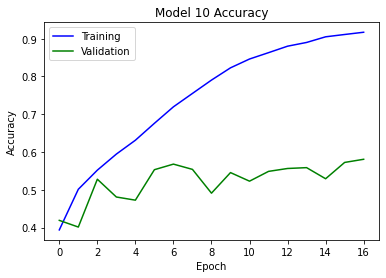

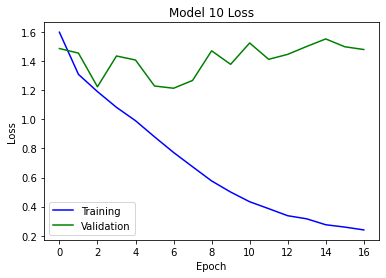

In [ ]:
plt.figure()
plt.plot(history10.history['accuracy'], color='b', label='Training')
plt.plot(history10.history['val_accuracy'], color='g', label='Validation')
plt.title('Model 10 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.figure()
plt.plot(history10.history['loss'], color='b', label='Training')
plt.plot(history10.history['val_loss'], color='g', label='Validation')
plt.title('Model 10 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower left')
plt.show()
